In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.fftpack import fft, ifft

In [63]:
def wavelet(freq, syc_n, t):
    s = syc_n / (2 * np.pi * freq)
    wavelet = np.exp(-1j * (2 * np.pi * freq * t) - 0.5 * (t / s)**2)
    return wavelet

def wavelet_h(freq, h, t):
    wavelet = np.exp(-1j * (2 * np.pi * freq * t) + 4 * np.log(2) * (t/h)**2)
    return wavelet

In [73]:
freq = 5
time = np.linspace(-1,1,200)
theta = np.pi/2.
std = .1

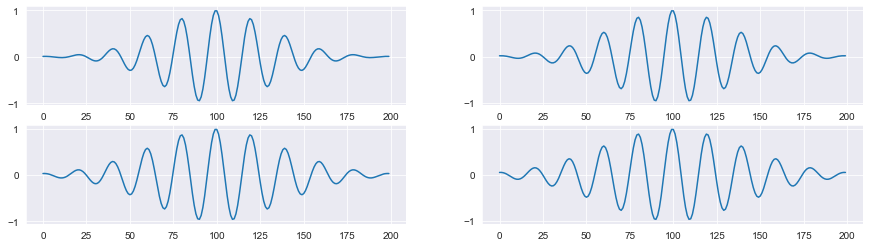

In [79]:
plt.figure(figsize=(15,4))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(wavelet(10, i + 10, time).real);
    #plt.plot(wavelet_h(5, i + 0.1, time).real);

/Users/nosratullah/opt/miniconda3/lib/python3.7/site-packages/numpy/fft/_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/Users/nosratullah/opt/miniconda3/lib/python3.7/site-packages/numpy/fft/_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


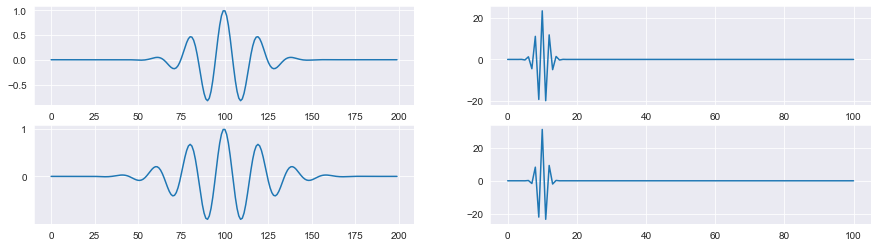

In [77]:
plt.figure(figsize=(15,4))
for i in range(4):
    plt.subplot(2,2,i+1)
    if (i%2 == 0):
        plt.plot(wavelet(5, i + 5, time).real);
    if (i%2 != 0):
        plt.plot(np.fft.rfft(wavelet(5, i + 5, time)).real);
    #plt.plot(wavelet_h(5, i + 0.1, time).real);

In [3]:
z =  np.exp(1j * (2 * np.pi * freq * time + theta))
sin = np.sin(2 * np.pi * freq * time + theta)
gauss = np.exp(-(time/std)**2/2)
wavelet = sin * gauss

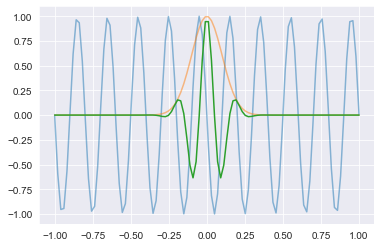

In [4]:
plt.plot(time,z.real, alpha = 0.5);
plt.plot(time, gauss, alpha = 0.5);
plt.plot(time, wavelet);

In [23]:
sampling = 1000
signal_time = np.arange(-1,1 + 1/sampling,1/sampling)

signal = np.sin(2*np.pi*5*signal_time) + np.random.normal(0,0.5, len(signal_time))
n_samples = len(signal)
shifted_kernel = np.zeros((n_samples, n_samples+len(wavelet) - 1))
for i in range(n_samples):
    shifted_kernel[i, i:i+len(wavelet)] = wavelet

convolved_signal = np.dot(signal, shifted_kernel)

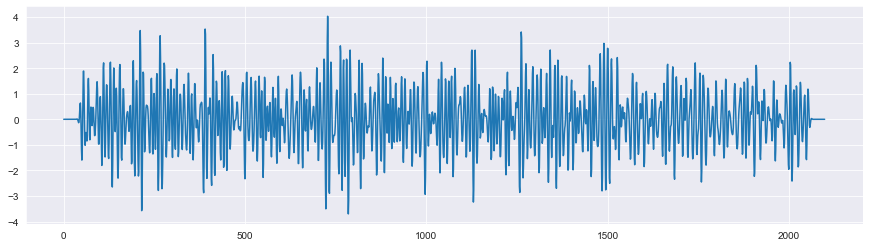

In [30]:
plt.figure(figsize=(15,4))
plt.plot(convolved_signal)

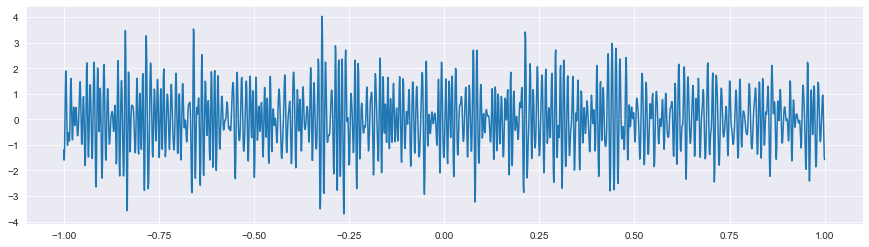

In [31]:
plt.figure(figsize=(15,4))
wavelet_transform = np.convolve(signal, wavelet, mode='same')
plt.plot(signal_time, wavelet_transform)

/Users/nosratullah/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


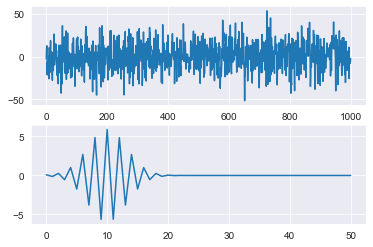

In [33]:
fft_signal = np.fft.rfft(signal)
fft_wavelet = np.fft.rfft(wavelet)
#plt.plot(fft.real[:100])
plt.subplot(2,1,1)
plt.plot(fft_signal.real);
plt.subplot(2,1,2)
plt.plot(fft_wavelet);

In [80]:
wavelet?